# Task - 1

## Q1: Create a function to convert RGB to Grey scale image. Use numpy, pytorch, or tf but don't direct available functions.

Hint: Use the formula: Gray = 0.299*R + 0.587*G + 0.114*B for the conversion.


### Soulution :

In [ ]:
# NumPy
import numpy as np

def rgb_to_grayscale_np(image):
    """
    Convert an RGB image to grayscale using NumPy.
    Conversion Formula :
    Gray = 0.299R + 0.587G + 0.114*B

    Parameters:
    - image: A 3D NumPy array of shape (height, width, 3), where 3 represents the RGB channels.

    Returns:
    - grayscale_image: A 2D NumPy array of shape (height, width), representing the grayscale image.
    """
    # Define the weights for the RGB channels according to the luminance formula
    r_weight = 0.2989
    g_weight = 0.5870
    b_weight = 0.1140

    # Multiply each channel by its respective weight and sum them to get the grayscale image
    grayscale_image = (r_weight * image[:, :, 0] +
                       g_weight * image[:, :, 1] +
                       b_weight * image[:, :, 2])

    return grayscale_image


In [ ]:
import torch
import torchvision.transforms as transforms

def rgb_to_grayscale_torch(image):
    # Convert the image to a PyTorch tensor
    image = transforms.ToTensor()(image)

    # Define the weights for the RGB channels
    weights = torch.tensor([0.2989, 0.5870, 0.1140])

    # Reshape the weights for broadcasting
    weights = weights.view(3, 1, 1)

    # Apply the weights to the image and sum to get the grayscale image
    grayscale_image = torch.sum(weights * image, dim=0)

    return grayscale_image

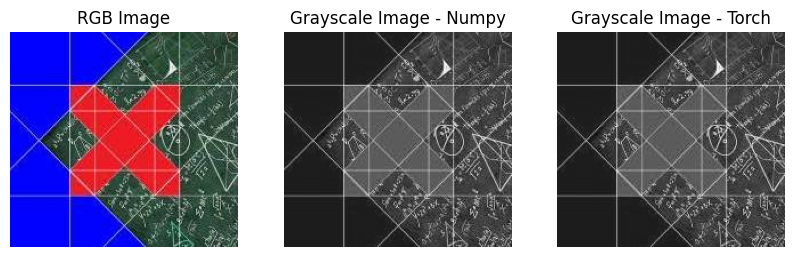

In [ ]:
# Example usage:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_path = '/content/campusx_logo.jpeg'
img = cv2.imread(img_path)

# Convert the image from BGR (OpenCV format) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the RGB image to grayscale using your custom function
grayscale_img_np = rgb_to_grayscale_np(img_rgb)
grayscale_img_torch = rgb_to_grayscale_torch(img_rgb)


# Plotting the RGB and Grayscale images
plt.figure(figsize=(10, 5))

# Plot RGB image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

# Plot Grayscale image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_img_np, cmap='gray')
plt.title("Grayscale Image - Numpy")
plt.axis("off")

# Plot Grayscale image
plt.subplot(1, 3, 3)
plt.imshow(grayscale_img_torch, cmap='gray')
plt.title("Grayscale Image - Torch")
plt.axis("off")

plt.show()

## Q2 : Create a function to convolve_image taking image, kernel as input and returned convolved image.

Hint :  Easy Pesy - done in the class.  

### Solution :

In [ ]:
import numpy as np

def convolve_image(image, kernel):
    """
    Perform a 2D convolution on an image using a given kernel without padding.

    :param image: numpy array, the input image (grayscale)
    :param kernel: numpy array, the kernel to apply (should be smaller than the image)
    :return: numpy array, the convolved image
    """
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output image
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Initialize the output image
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output


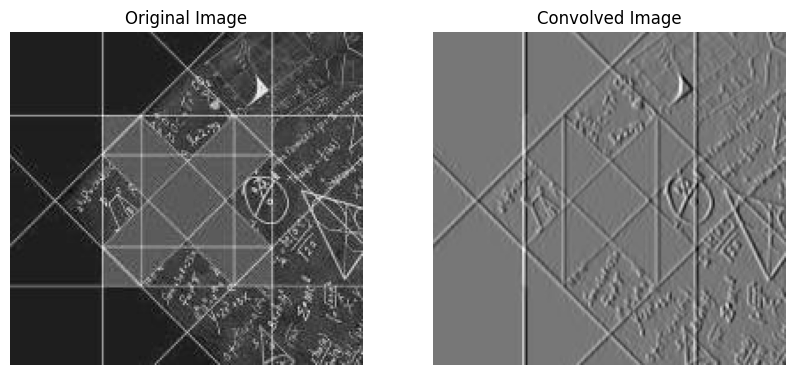

In [ ]:

# Load a grayscale image using OpenCV
image = cv2.imread('/content/campusx_logo.jpeg', cv2.IMREAD_GRAYSCALE)

# Define a sample kernel (e.g. Sobel edge detection kernel)
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Apply the convolution function
convolved_image = convolve_image(image, kernel)

# Plot the original and convolved images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title("Convolved Image")
plt.axis("off")

plt.show()

## Q3 : Apply Below Kernels - Note the effects you observe

1. ```
[[0, 0, 0],
 [0, 1, 0],
 [0, 0, 0]]
```

2. ```
[[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
 ```

3. ```
[[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]]
```

4. ```
 [[-1, -2, -1],
 [0,  0,  0],
 [1,  2,  1]]
 ```


5. ```
 [[ 0, -1,  0],
 [-1,  5, -1],
 [ 0, -1,  0]]
 ```

6. ```
 [[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
 ```
7. ```
[[-2, -1,  0],
 [-1,  1,  1],
 [ 0,  1,  2]]
```

8. ```
[[0.111,	0.111,	0.111]
[0.111,	0.111,	0.111]
[0.111,	0.111,	0.111]]
```

## Solution

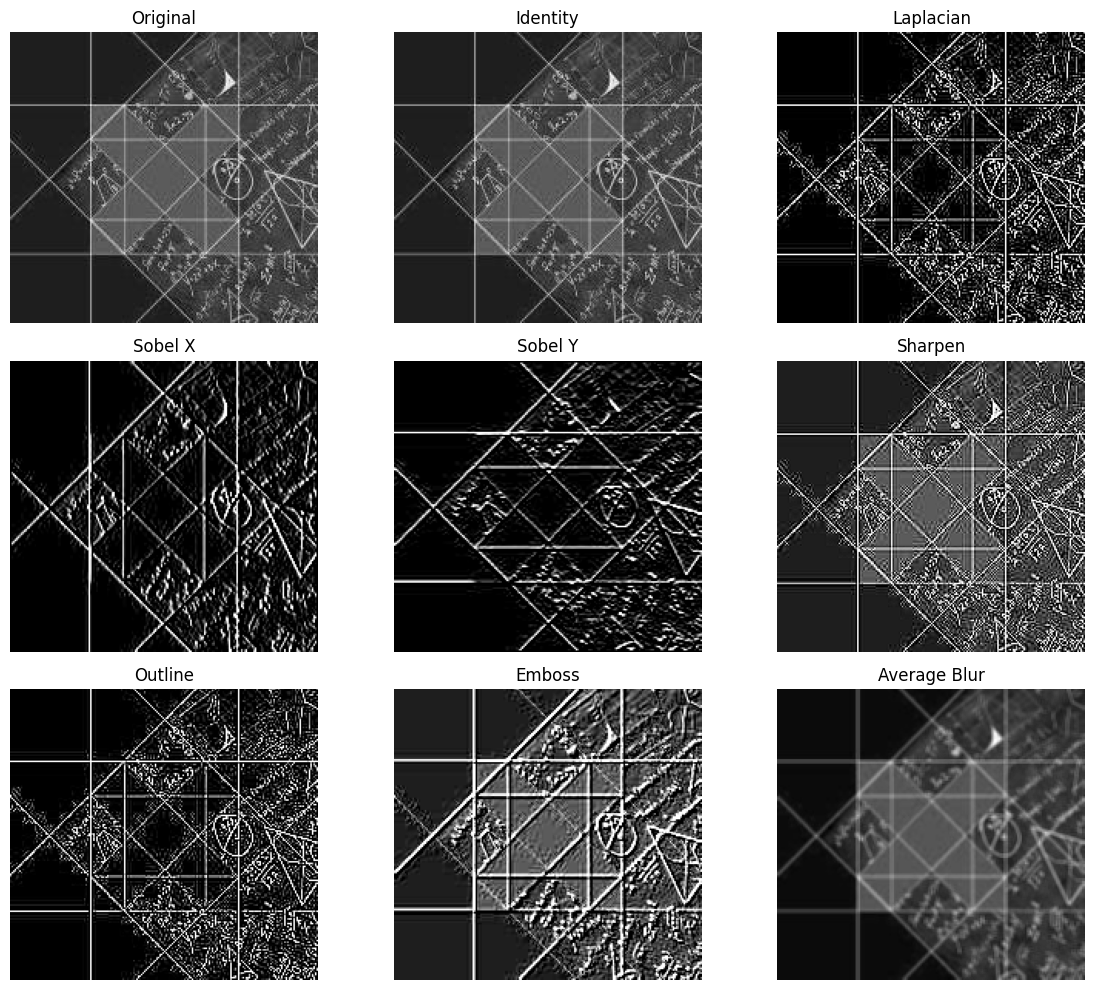

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/campusx_logo.jpeg', cv2.IMREAD_GRAYSCALE)

# Define kernels
kernels = {
    "Identity": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    "Laplacian": np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]]),
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Y": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Sharpen": np.array([[ 0, -1,  0], [-1,  5, -1], [ 0, -1,  0]]),
    "Outline": np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]]),
    "Emboss": np.array([[-2, -1,  0], [-1,  1,  1], [ 0,  1,  2]]),
    "Average Blur": np.array([[0.111, 0.111, 0.111], [0.111, 0.111, 0.111], [0.111, 0.111, 0.111]])
}

# Apply each kernel and display results
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (name, kernel) in enumerate(kernels.items(), start=2):
    filtered_image = cv2.filter2D(image, -1, kernel)
    plt.subplot(3, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Observations:

1. **Identity Kernel**
   - **Effect:** No visible change to the image. This kernel essentially performs no operation, as it's an identity filter.

2. **Laplacian**
   - **Effect:** Highlights edges and regions of rapid intensity change, often resulting in a sharper contrast where edges are emphasized.

3. **Sobel X**
   - **Effect:** Detects edges in the horizontal direction. The resulting image will show vertical lines where the gradient changes in the horizontal direction.

4. **Sobel Y**
   - **Effect:** Detects edges in the vertical direction. The resulting image will show horizontal lines where the gradient changes in the vertical direction.

5. **Sharpen**
   - **Effect:** Enhances the contrast and sharpness of edges. This makes the image appear crisper with more defined edges.

6. **Outline**
   - **Effect:** Similar to the Laplacian kernel, it highlights the edges by detecting regions of rapid intensity change.

7. **Emboss**
   - **Effect:** Creates a 3D effect by simulating light from a specific direction. The image will have a raised and shadowed effect, giving it an embossed appearance.

8. **Symmetric/AVG Blur**
   - **Effect:** Smooths the image by reducing the pixel values in the neighborhood, reducing noise and blurring the image.


## Question 4: Image Filtering and Transformation
**Task**: Implement a function to perform image filtering and transformation that includes:

* **Filtering**: Apply a Gaussian blur to the image to reduce noise and smooth the image.
* **Transformation**: Apply a rotation to the image by a specified angle.


Hints:
* For Gaussian blur, you can create a Gaussian kernel and apply it using convolution. https://en.wikipedia.org/wiki/Gaussian_blur
* For rotation, compute the rotation matrix and use cv2.warpAffine. https://theailearner.com/tag/cv2-warpaffine/


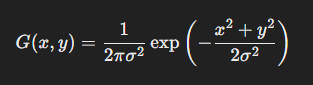


### Solution :

In [ ]:
import numpy as np

def gaussian_kernel(size: int, sigma: float) -> np.ndarray:
    """Create a Gaussian kernel.

    Args:
        size (int): The size of the kernel (should be odd).
        sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
        np.ndarray: The Gaussian kernel.
    """
    # Ensure the kernel size is odd
    if size % 2 == 0:
        size += 1

    # Create coordinate grid
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    # Compute the Gaussian kernel
    kernel = np.exp(-0.5 * (xx**2 + yy**2) / sigma**2)

    # Normalize the kernel
    kernel /= (2 * np.pi * sigma**2)
    kernel /= np.sum(kernel)  # Normalize to make the sum of all elements equal to 1

    return kernel

In [ ]:
def apply_filter_and_transform(image, sigma, angle):
    """Apply Gaussian blur and rotation to an image."""
    # Convert image to grayscale if it's RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create Gaussian kernel - Thumb rule to select Gaussian kernel Size
    kernel_size = int(6 * sigma + 1)

    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian blur
    depth = -1 # (-1 for all depth available)
    blurred_image = cv2.filter2D(image, -1, kernel)

    # Rotate image
    center = (blurred_image.shape[1] / 2, blurred_image.shape[0] / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(blurred_image, rotation_matrix, (blurred_image.shape[1], blurred_image.shape[0]))

    return blurred_image, rotated_image

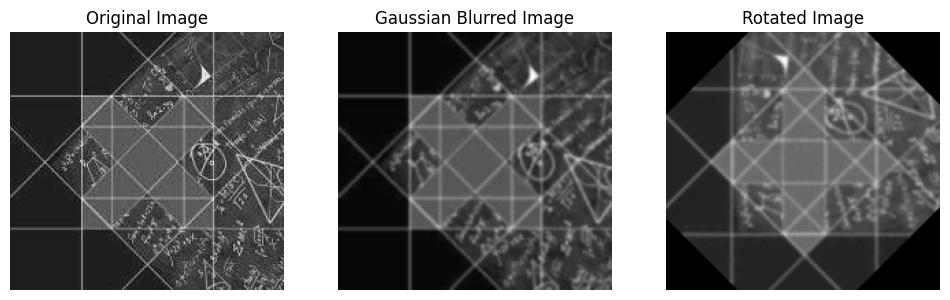

In [ ]:
# Load the image
image = cv2.imread('/content/campusx_logo.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur and rotation
sigma = 1.0  # Standard deviation for Gaussian kernel
angle = 45.0  # Angle for rotation
blurred_image, rotated_image = apply_filter_and_transform(image, sigma, angle)

# Display the images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gaussian Blurred Image
plt.subplot(1, 3, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

# Rotated Image after Gaussian Blur
plt.subplot(1, 3, 3)
plt.title('Rotated Image')
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.show()

## Question 5: Normalization

Apply different Image Normalization technique from scratch and visualize the effect.

* Do normalization - see effect on min, max, mean, std value
* See changes in Pixel Distribution

### Solution

#### 1. **Min-Max Normalization - In Range**

**Formula:**

**Formula:**

$$ \text{Normalized}_i = \text{Min}_{\text{Range}} + \frac{(\text{Image}_i - \text{Min}_{\text{Image}}) \times (\text{Max}_{\text{Range}} - \text{Min}_{\text{Range}})}{(\text{Max}_{\text{Image}} - \text{Min}_{\text{Image}})} $$


* Min Range and Max Range are the desired range values (e.g., 0 and 255).
* Min_Image and Max_Image are the minimum and maximum pixel values in the image.

#### 2. **Z-Score Normalization (Standard Score Normalization)**

**Formula:**

$$ \text{Normalized}_i = \frac{\text{Image}_i - \text{Mean}_{\text{Image}}}{\text{Std}_{\text{Image}}} $$

**Explanation:**
- Adjusts pixel values to have a mean of 0 and standard deviation of 1.
- Subtracts the mean of pixel values and divides by the standard deviation.

#### 3. **Mean Normalization**

**Formula:**

$$ \text{Normalized}_i = \frac{\text{Image}_i - \text{Mean}_{\text{Image}}}{\text{Max}_{\text{Image}} - \text{Min}_{\text{Image}}}
$$

**Explanation:**
- Centers pixel values around the mean and scales by the range of pixel values.

#### 4. **Robust Normalization**

**Formula:**

$$
 \text{Normalized}_i = \frac{\text{Image}_i - \text{Median}_{\text{Image}}}{\text{MAD}}
$$

- **MAD** (Median Absolute Deviation) is a measure of dispersion.

**Explanation:**
- Uses the median and MAD for normalization, robust to outliers.

#### 5. **Unit Length Normalization**

**Formula:**

$$
 \text{Normalized}_i = \frac{\text{Image}_i}{\sqrt{\sum (\text{Image}_i^2)}}
$$

**Explanation:**
- Scales pixel values to ensure the total magnitude is 1.
- Useful for tasks requiring unit length normalization.

#### 6. **Global Normalization**

**Formula:**

$$
 \text{Normalized}_i = \frac{\text{Image}_i - \text{Min}_{\text{Global}}}{\text{Max}_{\text{Global}} - \text{Min}_{\text{Global}}}
$$

**Explanation:**
- Normalizes pixel values based on the global min and max values across the entire image or dataset.
- Say if we have 100 images we find min amd max pixelf value among all the images in the dataset

### Summary

1. **Min-Max Normalization with Range**: Scales pixel values to given range.
2. **Z-Score Normalization**: Centers pixel values around 0 with unit variance.
3. **Mean Normalization**: Centers around the mean and scales by the image range.
4. **Robust Normalization**: Uses median and MAD, robust to outliers.
5. **Unit Length Normalization**: Scales to unit length.
6. **Global Normalization**: Normalizes based on global min and max.

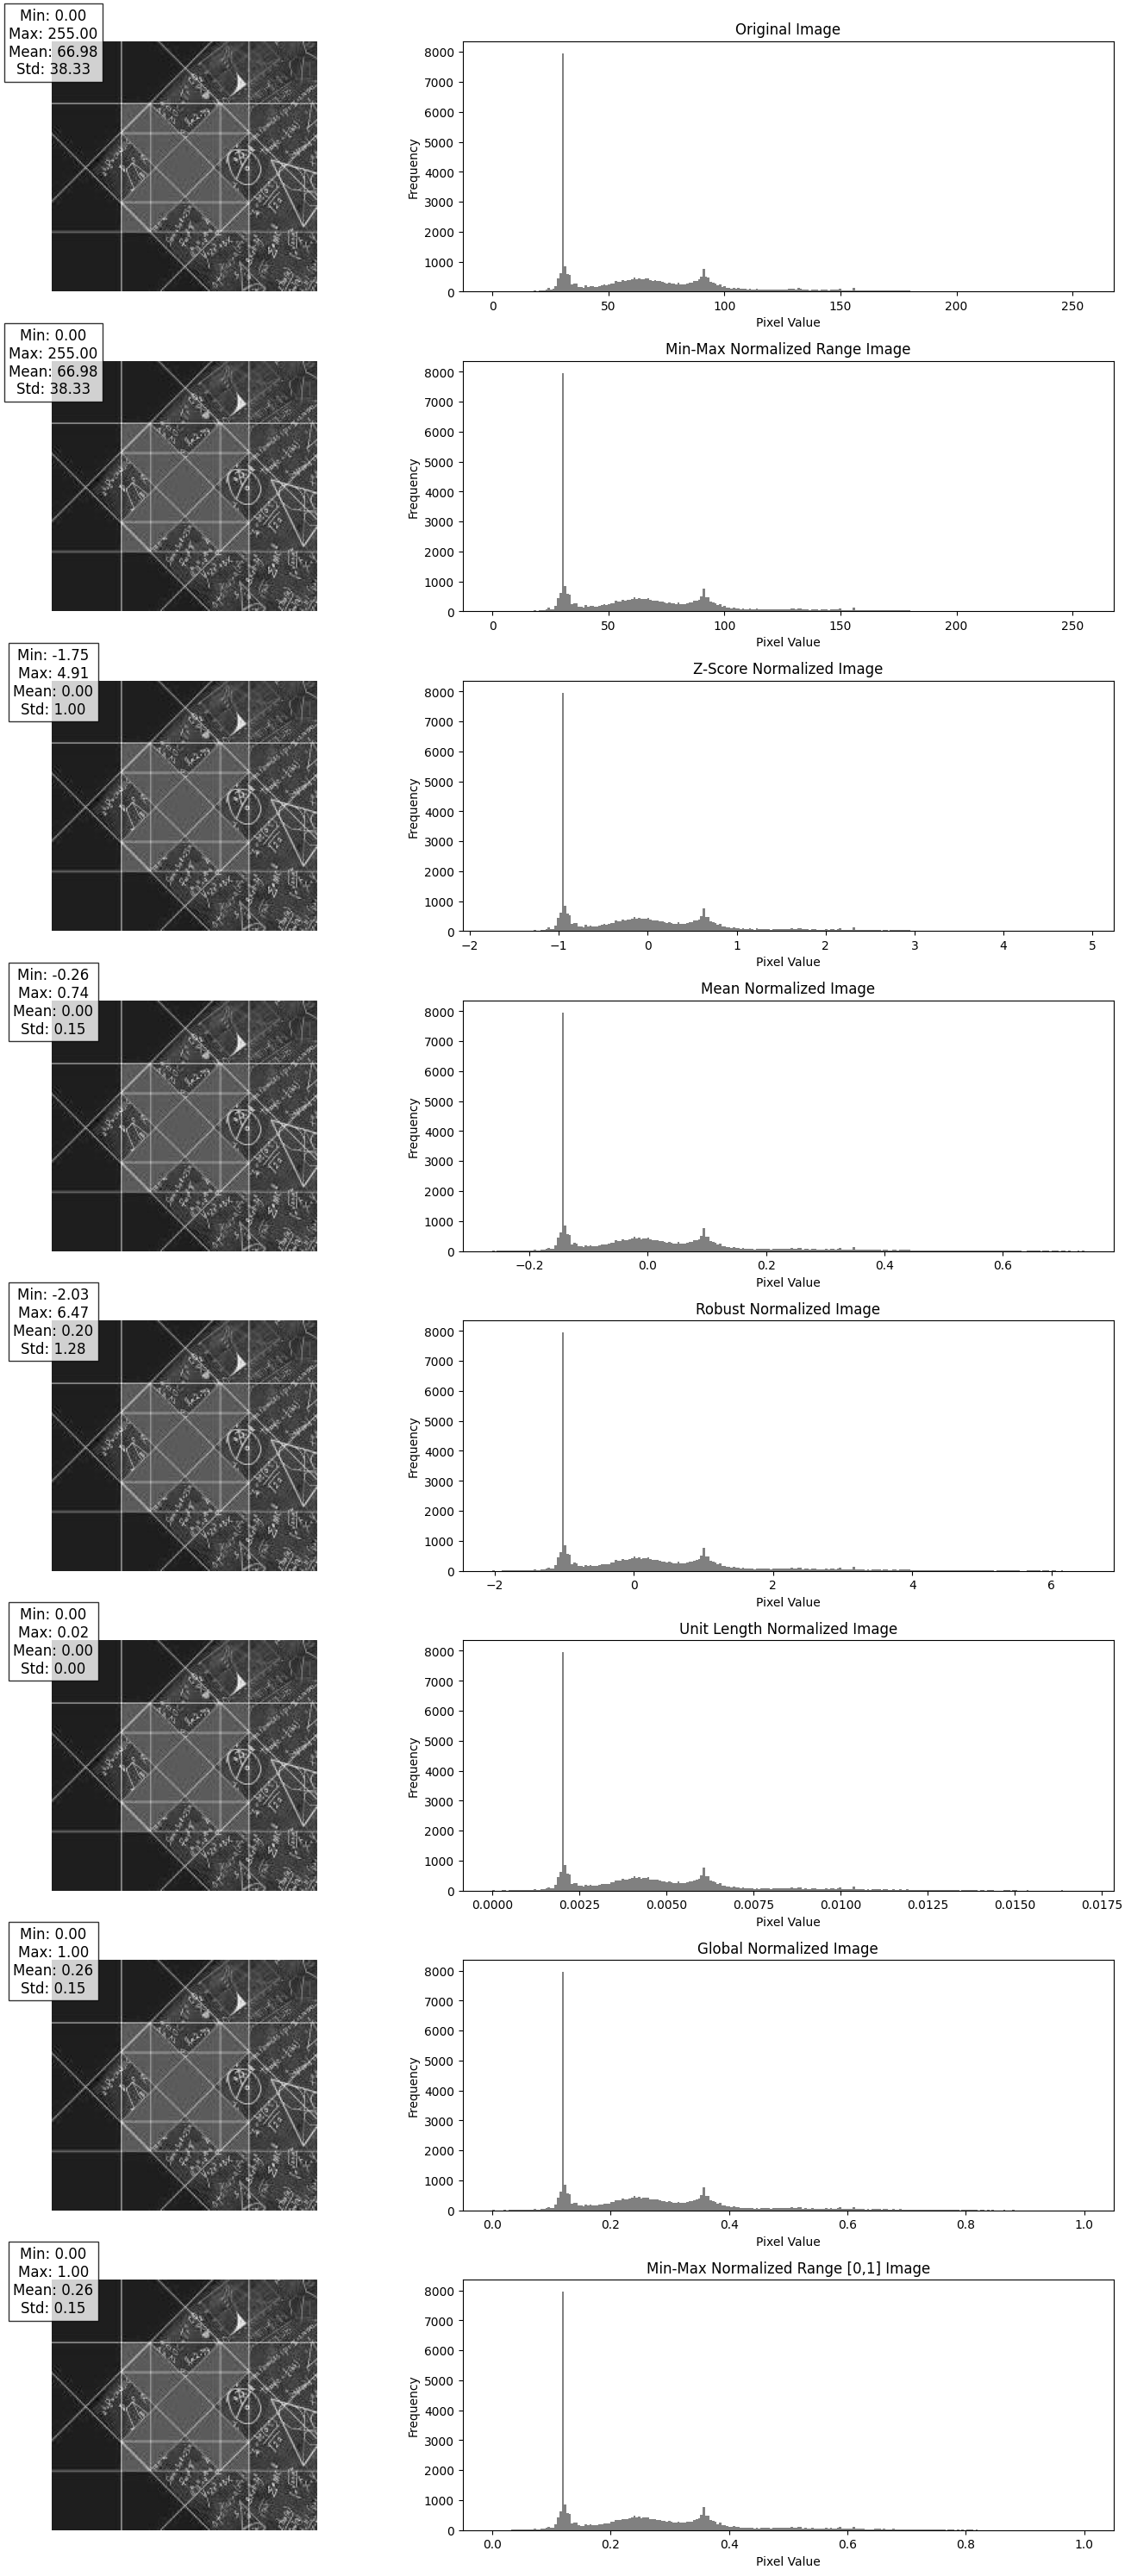

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/campusx_logo.jpeg', cv2.IMREAD_GRAYSCALE).astype(int)

def compute_statistics(image: np.ndarray) -> dict:
    """Compute and return image statistics."""
    stats = {
        'Min': np.min(image),
        'Max': np.max(image),
        'Mean': np.mean(image),
        'Std': np.std(image)
    }
    return stats

def min_max_normalize_to_range(image, min_range= 0, max_range = 255) :
    """Normalize the image to a specific range."""
    min_image = np.min(image)
    max_image = np.max(image)
    # Apply Min-Max normalization to the desired range
    normalized_image = min_range + ((image - min_image) * (max_range - min_range)) / (max_image - min_image)
    return normalized_image

def z_score_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Z-Score Normalization."""
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / std

def mean_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Mean Normalization."""
    mean = np.mean(image)
    return (image - mean) / (np.max(image) - np.min(image))

def robust_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Robust Normalization."""
    median = np.median(image)
    mad = np.median(np.abs(image - median))
    return (image - median) / mad

def unit_length_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Unit Length Normalization."""
    norm = np.sqrt(np.sum(image**2))
    return image / norm if norm != 0 else image

def global_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Global Normalization."""
    min_global = np.min(image)
    max_global = np.max(image)
    return (image - min_global) / (max_global - min_global)

def plot_image_and_histogram(image: np.ndarray, ax_img, ax_hist, title: str):
    """Plot image and histogram."""
    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.axis('off')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=256, color='gray', range=[image.min(), image.max()])
    ax_hist.set_title(title)
    ax_hist.set_xlabel('Pixel Value')
    ax_hist.set_ylabel('Frequency')

# Apply normalization techniques
min_max_img_range = min_max_normalize_to_range(image, 0, 255)
min_max_img = min_max_normalize_to_range(image, 0, 1)

z_score_img = z_score_normalization(image)
mean_img = mean_normalization(image)
robust_img = robust_normalization(image)
unit_length_img = unit_length_normalization(image)
global_img = global_normalization(image)

# Compute statistics for original and normalized images
original_stats = compute_statistics(image)
min_max_stats = compute_statistics(min_max_img)
min_max_img_range_stats = compute_statistics(min_max_img_range)
z_score_stats = compute_statistics(z_score_img)
mean_stats = compute_statistics(mean_img)
robust_stats = compute_statistics(robust_img)
unit_length_stats = compute_statistics(unit_length_img)
global_stats = compute_statistics(global_img)

# Display statistics
def display_stats(ax, stats):
    """Display statistics on the given axis."""
    stats_text = (f"Min: {stats['Min']:.2f}\n"
                  f"Max: {stats['Max']:.2f}\n"
                  f"Mean: {stats['Mean']:.2f}\n"
                  f"Std: {stats['Std']:.2f}")
    ax.text(0.5, 0.5, stats_text, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

# Plot images and histograms
fig, axs = plt.subplots(8, 2, figsize=(15, 30))
axs = axs.flatten()

# Original Image
plot_image_and_histogram(image, axs[0], axs[1], 'Original Image')
display_stats(axs[0], original_stats)

# Min-Max Normalized Range Image
plot_image_and_histogram(min_max_img_range, axs[2], axs[3], 'Min-Max Normalized Range Image')
display_stats(axs[2], min_max_img_range_stats)


# Z-Score Normalized Image
plot_image_and_histogram(z_score_img, axs[4], axs[5], 'Z-Score Normalized Image')
display_stats(axs[4], z_score_stats)

# Mean Normalized Image
plot_image_and_histogram(mean_img, axs[6], axs[7], 'Mean Normalized Image')
display_stats(axs[6], mean_stats)

# Robust Normalized Image
plot_image_and_histogram(robust_img, axs[8], axs[9], 'Robust Normalized Image')
display_stats(axs[8], robust_stats)

# Unit Length Normalized Image
plot_image_and_histogram(unit_length_img, axs[10], axs[11], 'Unit Length Normalized Image')
display_stats(axs[10], unit_length_stats)

# Global Normalized Image
plot_image_and_histogram(global_img, axs[12], axs[13], 'Global Normalized Image')
display_stats(axs[12], global_stats)

# Min-Max Normalized Image
plot_image_and_histogram(min_max_img, axs[14], axs[15], 'Min-Max Normalized Range [0,1] Image')
display_stats(axs[14], min_max_stats)

plt.tight_layout()
plt.show()


# Happy Learning !
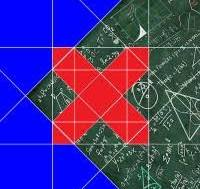
